In [1]:
import pandas as pd
from Visualization import visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dict_data_path = './Data/dict5000.csv'
file_path = './Data/stopwords.txt'

sent_dict = pd.read_csv(dict_data_path,encoding='utf-8-sig')
with open(file_path,'r') as op:
    stopwords = op.readlines()
    stopwords = stopwords[0].split(',')

# 시각화에 필요한 단어 빈도수 그래프
news_data = pd.read_csv('./Data/news_words_freq.csv',encoding='utf-8-sig')
community_data = pd.read_csv('./Data/community_words_freq.csv',encoding='utf-8-sig')
sns_data = pd.read_csv('./Data/sns_words_freq.csv',encoding='utf-8-sig')

In [3]:
sent_dict[sent_dict['단어']=='패널']

,Unnamed: 0,단어,회귀계수,points
713,4430,패널,0.513716,0.127869


In [4]:
a =[1,2,3,4,5]
[x for x in a]

[1, 2, 3, 4, 5]

In [18]:
community_data[community_data['word1']=='불교']

,Unnamed: 0,word1,word2,freq
914,914,불교,중국,392
4314,4314,불교,유교,253
6639,6639,불교,사람,221
6691,6691,불교,정부,220
11413,11413,불교,세계,182
...,...,...,...,...
3395645,3395645,불교,심화,1
3395648,3395648,불교,압도,1
3395649,3395649,불교,야권,1
3395650,3395650,불교,약물,1


['두산'] 20
       Unnamed: 0 word1 word2  freq
4195         4195    두산    유교   253
8996         8996    두산    한국   196
21398       21398    두산    중국   131
30352       30352    두산    일본   108
31338       31338    두산    제사   107
31709       31709    두산    지분   106
32680       32680    두산    블랙   104
35709       35709    두산    불교    99
38473       38473    두산    산위    95
44151       44151    두산    보름    89
54462       54462    두산    전통    79
54834       54834    두산    시대    79
76325       76325    두산    사람    65
76647       76647    두산    보유    65
81118       81118    두산    문명    63
81497       81497    두산   성균관    63
90004       90004    두산    투자    59
91748       91748    두산   하느님    58
91893       91893    두산    숭배    58
94451       94451    두산    정월    58


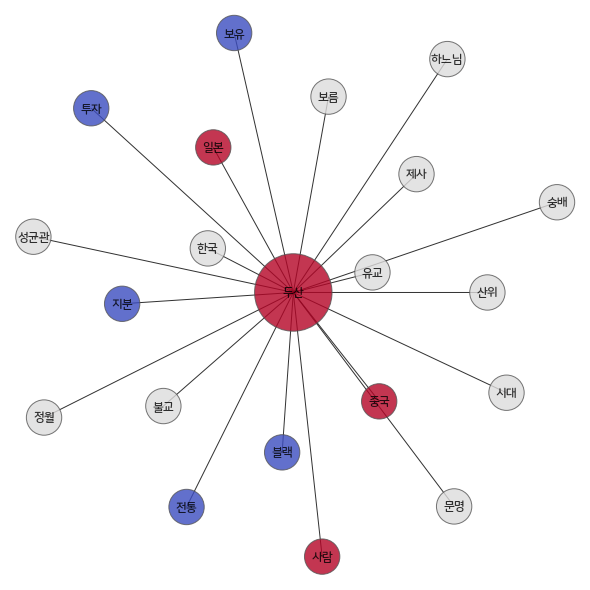

0

In [14]:
visualization.draw(community_data,sent_dict,['두산'],20)

['태양광'] 10
       Unnamed: 0 word1 word2  freq
2061         2061   태양광    환경   308
4645         4645   태양광    투자   210
5787         5787   태양광    활용   188
5927         5927   태양광    화학   185
10678       10678   태양광    패널   138
11753       11753   태양광    효율   131
12487       12487   태양광    확대   126
15621       15621   태양광  플라스틱   111
17061       17061   태양광    한국   105
19972       19972   태양광    협약    96


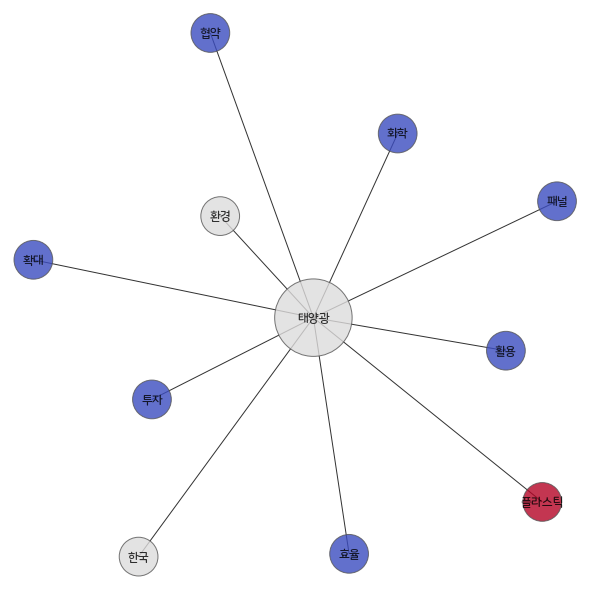

{'태양광': 0,
 '환경': 0,
 '투자': -1,
 '활용': -1,
 '화학': -1,
 '패널': -1,
 '효율': -1,
 '확대': -1,
 '플라스틱': 1,
 '한국': 0,
 '협약': -1}

In [19]:
visualization.draw(news_data,sent_dict,['태양광'],10)

In [ ]:
visualization.draw(news_data,sent_dict,['플라스틱'],10)

In [17]:
sent_dict[sent_dict['단어']=='환경']

,Unnamed: 0,단어,회귀계수,points
4148,4905,환경,-0.189683,-0.035012


In [14]:
sent_dict[sent_dict['단어']=='환경']

,Unnamed: 0,단어,회귀계수,points
2790,4897,환경,-0.723825,-0.111566


In [8]:
news_data[news_data['word1'] == '두산'][['word1','word2']][:10]

,word1,word2
40455,두산,환경
43692,두산,페놀
65171,두산,배출
72846,두산,사업
74131,두산,오염
76398,두산,수소
86278,두산,사고
87093,두산,발전
101468,두산,탄소
119041,두산,환경부


['패널'] 10
        Unnamed: 0 word1 word2  freq
15902        15902    패널    화학   102
18769        18769    패널    환경    93
41208        41208    패널  플라스틱    60
66673        66673    패널    확대    45
72429        72429    패널    효율    42
80313        80313    패널    효과    40
98368        98368    패널    활용    35
98630        98630    패널    핵심    35
106934      106934    패널    협약    33
113591      113591    패널    확보    32


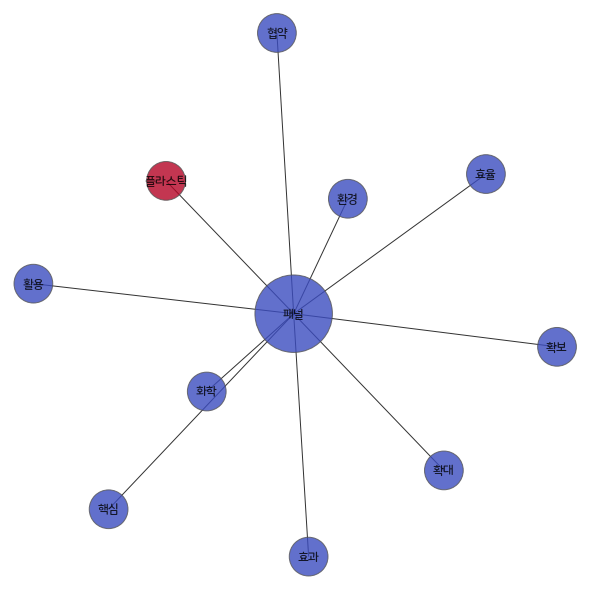

{'패널': 0,
 '화학': 0,
 '환경': 0,
 '플라스틱': 1,
 '확대': 0,
 '효율': 0,
 '효과': 0,
 '활용': 0,
 '핵심': 0,
 '협약': 0,
 '확보': 0}

In [20]:
visualization.draw(news_data,sent_dict,['패널'],10)

['태양광', '패널'] 10
        Unnamed: 0 word1 word2  freq
1919          1919   태양광    환경   277
4945          4945   태양광    투자   181
6971          6971   태양광    화학   158
9054          9054   태양광    패널   138
10178        10178   태양광    효율   130
10775        10775   태양광    확대   126
12066        12066   태양광    활용   119
13686        13686   태양광  플라스틱   111
15684        15684   태양광    한국   103
18207        18207   태양광    협약    95
15902        15902    패널    화학   102
18769        18769    패널    환경    93
41208        41208    패널  플라스틱    60
66673        66673    패널    확대    45
72429        72429    패널    효율    42
80313        80313    패널    효과    40
98368        98368    패널    활용    35
98630        98630    패널    핵심    35
106934      106934    패널    협약    33
113591      113591    패널    확보    32


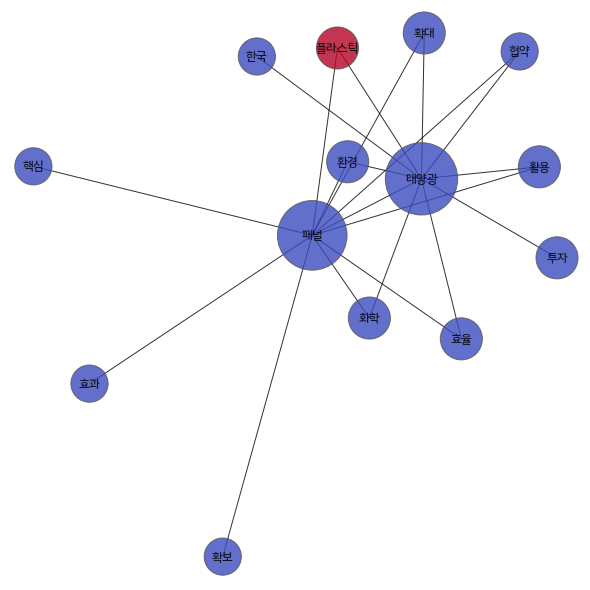

{'태양광': 0,
 '패널': 0,
 '환경': 0,
 '화학': 0,
 '플라스틱': 1,
 '투자': 0,
 '효율': 0,
 '확대': 0,
 '활용': 0,
 '협약': 0,
 '한국': 0,
 '효과': 0,
 '핵심': 0,
 '확보': 0}

In [21]:
visualization.draw(news_data,sent_dict,['태양광','패널'],10)

['머스크'] 30
        Unnamed: 0 word1  word2  freq
16722        16722   머스크    배터리    99
28711        28711   머스크     채굴    74
36014        36014   머스크   비트코인    65
36303        36303   머스크    전기차    65
54786        54786   머스크     미국    51
55175        55175   머스크     탄소    50
57387        57387   머스크   환경오염    49
61831        61831   머스크     환경    47
73181        73181   머스크    테슬라    42
73184        73184   머스크    에너지    42
73186        73186   머스크     문제    42
84993        84993   머스크     생산    39
89352        89352   머스크     사용    38
99284        99284   머스크  최고경영자    35
105573      105573   머스크     중국    34
106040      106040   머스크     이유    33
110333      110333   머스크     시장    33
110362      110362   머스크     중단    33
110982      110982   머스크     전기    32
119431      119431   머스크   화석연료    31
121141      121141   머스크     세계    30
122122      122122   머스크   연합뉴스    30
125825      125825   머스크     정부    30
128323      128323   머스크    친환경    29
134822      134822   머스크     발전    28
1

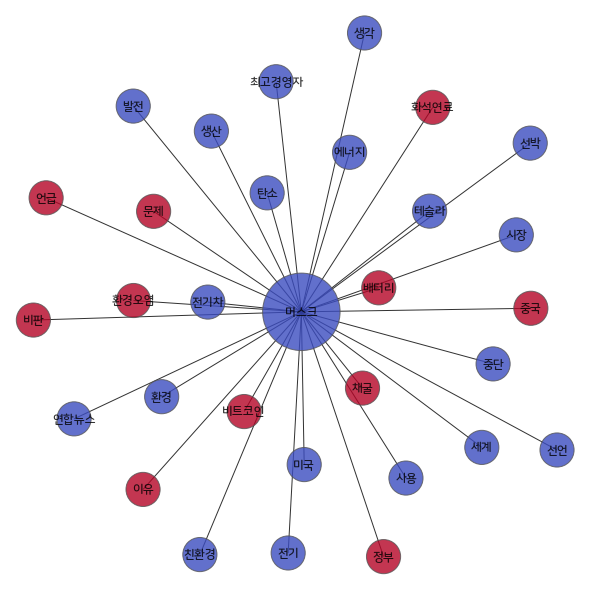

{'머스크': 0,
 '배터리': 1,
 '채굴': 1,
 '비트코인': 1,
 '전기차': 0,
 '미국': 0,
 '탄소': 0,
 '환경오염': 1,
 '환경': 0,
 '테슬라': 0,
 '에너지': 0,
 '문제': 1,
 '생산': 0,
 '사용': 0,
 '최고경영자': 0,
 '중국': 1,
 '이유': 1,
 '시장': 0,
 '중단': 0,
 '전기': 0,
 '화석연료': 1,
 '세계': 0,
 '연합뉴스': 0,
 '정부': 1,
 '친환경': 0,
 '발전': 0,
 '비판': 1,
 '선언': 0,
 '언급': 1,
 '선박': 0,
 '생각': 0}

In [22]:
visualization.draw(news_data,sent_dict,['머스크'],30)

['태양광'] 20
        Unnamed: 0 word1  word2  freq
30132        30132   태양광   환경오염     6
50950        50950   태양광     패널     4
56698        56698   태양광   헬리콥터     4
56700        56700   태양광   프로그램     4
99849        99849   태양광     회전     2
99850        99850   태양광     파루     2
99851        99851   태양광     트랙     2
143973      143973   태양광    파티션     2
143974      143974   태양광     효과     2
143975      143975   태양광     확산     2
143976      143976   태양광     학교     2
143977      143977   태양광     피오     2
143978      143978   태양광  폴리에스터     2
143979      143979   태양광    포스트     2
143980      143980   태양광    폐기물     2
143981      143981   태양광     폐기     2
202987      202987   태양광     한국     1
202988      202988   태양광     풍력     1


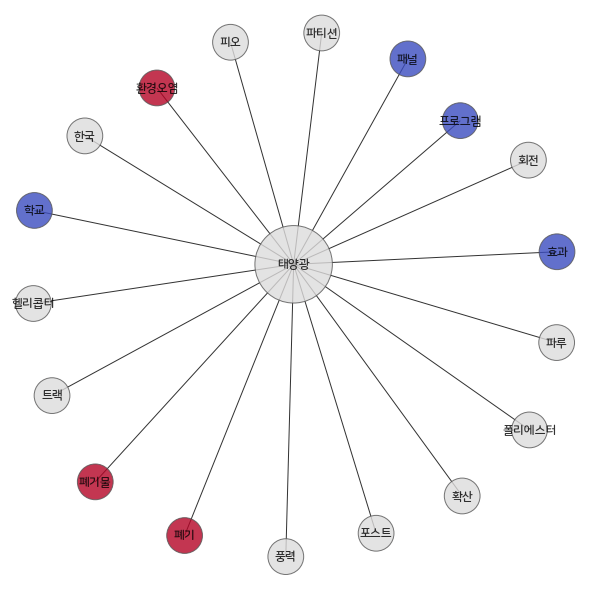

{'태양광': 0,
 '환경오염': 1,
 '패널': -1,
 '헬리콥터': 0,
 '프로그램': -1,
 '회전': 0,
 '파루': 0,
 '트랙': 0,
 '파티션': 0,
 '효과': -1,
 '확산': 0,
 '학교': -1,
 '피오': 0,
 '폴리에스터': 0,
 '포스트': 0,
 '폐기물': 1,
 '폐기': 1,
 '한국': 0,
 '풍력': 0}

In [39]:
visualization.draw(sns_data,sent_dict,['태양광'],20)

['아이스팩'] 20
       Unnamed: 0 word1 word2  freq
4800         4800  아이스팩  플라스틱   184
7753         7753  아이스팩  환경오염   149
7754         7754  아이스팩   재사용   149
7988         7988  아이스팩   재활용   147
9010         9010  아이스팩    자원   138
10328       10328  아이스팩    환경   129
11574       11574  아이스팩    흡수   121
15415       15415  아이스팩    자연   104
16092       16092  아이스팩   폐기물   101
16227       16227  아이스팩    증가   101
16909       16909  아이스팩   코로나    99
17244       17244  아이스팩   친환경    98
17831       17831  아이스팩    전국    96
18205       18205  아이스팩    적극    95
19036       19036  아이스팩    일종    93
20935       20935  아이스팩    업체    88
21122       21122  아이스팩    추진    87
22063       22063  아이스팩   종량제    85
25302       25302  아이스팩    참여    79
31261       31261  아이스팩    주민    71


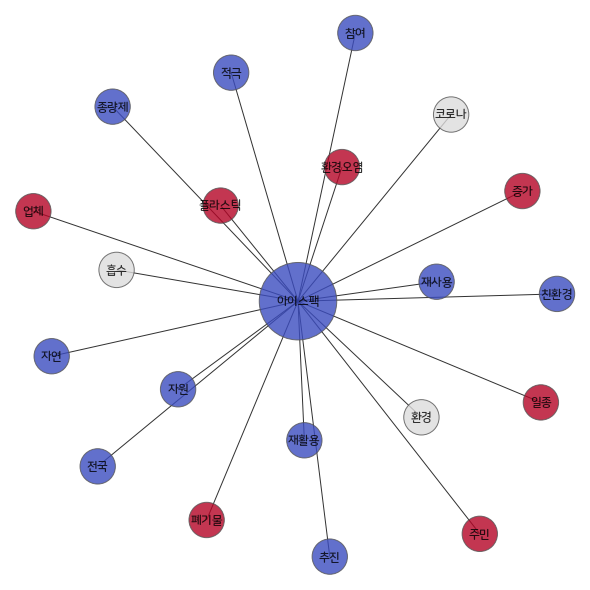

{'아이스팩': -1,
 '플라스틱': 1,
 '환경오염': 1,
 '재사용': -1,
 '재활용': -1,
 '자원': -1,
 '환경': 0,
 '흡수': 0,
 '자연': -1,
 '폐기물': 1,
 '증가': 1,
 '코로나': 0,
 '친환경': -1,
 '전국': -1,
 '적극': -1,
 '일종': 1,
 '업체': 1,
 '추진': -1,
 '종량제': -1,
 '참여': -1,
 '주민': 1}

In [12]:
visualization.draw(news_data,sent_dict,['아이스팩'],20)

In [9]:
sent_dict[sent_dict['단어']=='아이스팩']

,Unnamed: 0,단어,회귀계수,points
160,2641,아이스팩,1.095371,0.277052


In [20]:
import os,sys
from konlpy.tag import Mecab

In [3]:
import os

In [13]:
ls = [x for x in os.listdir('./Data/') if x[-4:]=='.csv']

In [14]:
ls

['community_words_freq.csv',
 'data with label 0.csv',
 'dict.csv',
 'dict4000.csv',
 'labeling_data.csv',
 'news_words_freq.csv',
 'sns_words_freq.csv',
 'words_freq.csv']

In [19]:
for file_path in ls:
    #data = pd.read_csv('./Data'+file_path,encoding='utf-8-sig')
    try:
        data = pd.read_csv('./Data/'+file_path,encoding='utf-8-sig')
        data.to_csv('./Data/'+file_path,encoding='utf-8-sig',index=None)
    except:
        print('not cp949')
    

In [8]:
sent_dict[sent_dict['회귀계수']>0][:20]

,Unnamed: 0,단어,회귀계수,points
0,2336,소재,3.953528,1.000000
1,4144,캠페인,2.982733,0.754445
2,3587,정화,2.864291,0.724486
3,1353,마련,2.738585,0.692690
4,3789,지속,2.644658,0.668932
5,2799,에코,2.624750,0.663896
6,3523,전환,2.597610,0.657031
7,4896,확대,2.552981,0.645743
8,1771,변신,2.351751,0.594843
9,2434,숲,2.348331,0.593978


In [7]:
sent_dict[sent_dict['회귀계수']<0][:20]

,Unnamed: 0,단어,회귀계수,points
2491,4916,환경오염,-5.371946,-1.000000
2492,2922,오염,-3.651343,-0.679607
2493,1526,문제,-3.165671,-0.589170
2494,4492,페놀,-3.065027,-0.570429
2495,3462,적발,-2.880503,-0.536069
2496,118,개비,-2.798210,-0.520745
2497,815,노출,-2.768219,-0.515161
2498,3800,지적,-2.581029,-0.480304
2499,4194,코인,-2.563568,-0.477052
2500,1237,때문,-2.483469,-0.462137


In [30]:
file_path = './Data/dict.csv'


In [28]:
data

,Unnamed: 0,단어,회귀계수,points
0,2336,소재,3.953528,1.000000
1,4144,캠페인,2.982733,0.754445
2,3587,정화,2.864291,0.724486
3,1353,마련,2.738585,0.692690
4,3789,지속,2.644658,0.668932
...,...,...,...,...
4704,1493,목적,-0.003178,-0.000283
4705,2257,성능,-0.002527,-0.000162
4706,4345,테마,-0.002320,-0.000123
4707,3324,입증,-0.002276,-0.000115


In [6]:
from eunjeon import Mecab
import re
import re

from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd

from tqdm import tqdm
import operator

import networkx as nx
import matplotlib.pyplot as plt
from eunjeon import Mecab

In [9]:
news = pd.concat([pd.read_csv('Data/crawling data/친환경_news.csv',encoding='utf-8-sig'),pd.read_csv('Data/crawling data/환경오염_news.csv',encoding='utf-8-sig')])

In [10]:
features=5000

In [11]:
# def tokenizer(text):
#     mecab = Mecab()
#     text = str(text)
#     #okt = Okt()
#     re.sub('[^ ㄱ-ㅣ가-힣]+',' ',text)
#     nouns = mecab.nouns(text)
#     nouns = [noun for noun in nouns if not(noun in stopwords)]
#     if len(nouns) == 0:
#         return '0'
#     return nouns

def tokenizer(text):
    #okt = Okt()
    mecab = Mecab()
    poses = ['NNG', 'NNP', 'NNB', 'NR', 'NP']
    re.sub('[\W]',' ',text)
    result = []
    token_pos = mecab.pos(text)
    for word, pos in token_pos:
        if (pos in poses) and not(word in stopwords):
            result.append(str(word))
    return result

def mk_tfidf(data):
#    data['내용'] = data['내용'].apply(lambda x: tokenizer(str(x)))
    cv = CountVectorizer(max_features=features,tokenizer = tokenizer) # data의 tf-idf 구축, tokenizer로 get_nouns 사용
    tdm = cv.fit_transform(data['내용']) # 위의 파라미터 수에 맞게 tdm 생성
    dataset = pd.DataFrame(data=tdm.todense(),columns=cv.get_feature_names())
    return dataset


In [7]:
news['내용'] = news.astype('str')
news['명사'] = news['내용'].apply(lambda x : tokenizer(x))
tmp = 

NameError: name 'news' is not defined

In [ ]:
new

In [35]:
mk_tfidf(news)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [8]:
def clean_text(text):
    cleaned_text = re.sub('[^ ㄱ-ㅣ가-힣]+',' ',text) # 한국어, 스페이스바를 제외한 모든 문자 제거
    cleaned_text = ' '.join(cleaned_text.split()) # 너무 많은 공백이 생기므로 공백 1개로
    return cleaned_text

def get_nouns(text):
    mecab = Mecab()
    nouns = mecab.nouns(text) # 명사 추출
    nouns = [word for word in nouns if not (word in stopwords)] # 불용어 제거
    nouns = [word for word in nouns if len(word)>1] # 길이가 1 이상만 추출
    return nouns

def clean_tokenizing(data):
    data = data.dropna() # 결측값 제거
    data['내용'] = data['내용'].apply(lambda x: clean_text(x)) # 한국어만 추출
    data['명사'] = data['내용'].apply(lambda x: get_nouns(x)) # 명사만 추출

    drop_index_list = [] # 지워버릴 index를 담는 리스트
    for i, row in data.iterrows():
        temp_nouns = row['명사']
        if len(temp_nouns) == 0: # 만약 명사리스트가 비어 있다면
            drop_index_list.append(i) # 지울 index 추가
    data = data.drop(drop_index_list) # 해당 index를 지우기
    data.index = range(len(data))
    return data
def mk_tfidf(data):
    cv = CountVectorizer(max_features=features) # data의 tf-idf 구축, tokenizer로 get_nouns 사용
    tdm = cv.fit_transform(data['내용']) # 위의 파라미터 수에 맞게 tdm 생성
    dataset = pd.DataFrame(data=tdm.todense(),columns=cv.get_feature_names())
    return dataset

In [10]:
features=5000

news = pd.concat([pd.read_csv('Data/crawling data/친환경_news.csv',encoding='utf-8-sig'),pd.read_csv('Data/crawling data/환경오염_news.csv',encoding='utf-8-sig')])
news_data = clean_tokenizing(news)
news_tf_idf = mk_tfidf(news_data)

<ipython-input-8-161fd2d6b24c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['내용'] = data['내용'].apply(lambda x: clean_text(x)) # 한국어만 추출
<ipython-input-8-161fd2d6b24c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['명사'] = data['내용'].apply(lambda x: get_nouns(x)) # 명사만 추출


In [13]:
#news
news_data = clean_tokenizing(news.iloc[0])
news_tf_idf = mk_tfidf(news_data)

AttributeError: 'str' object has no attribute 'apply'

In [11]:
news_tf_idf

,가게,가격,가격에,가격은,가격이,가공,가구,가까운,가까이,가는,...,흔히,흡수하는,흡수해,희대의,희망하는,희토류,힘든,힘을,힘이,힘입어
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1127,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 10 artists>

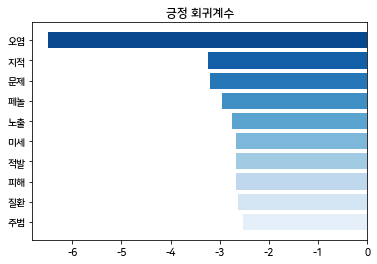

In [11]:
plt.rcParams['axes.unicode_minus'] = False

x = sent_dict['단어'][:10].tolist()[::-1]
y = sent_dict['회귀계수'][:10].tolist()[::-1]
plt.title('긍정 회귀계수')
plt.barh(x,y,color=sns.color_palette('Blues',len(x)))

<BarContainer object of 10 artists>

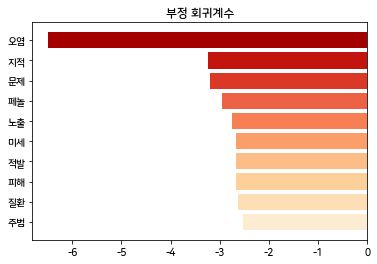

In [12]:
sent_dict =sent_dict[sent_dict['회귀계수'] < 0]
x = sent_dict['단어'][:10].tolist()[::-1]
y = sent_dict['회귀계수'][:10].tolist()[::-1]
plt.title('부정 회귀계수')
plt.barh(x,y,color=sns.color_palette('OrRd',len(x)))